# Compress Sensing

Based on the Equation 
### y = CΨs
where
y = measurement,
C = constant value assigned to random samples (sample size * # of data matrix),
s = sparse,

I have generated simple frequency to understand compess sensing.
Basic idea for compress sensing is that as long as we have certain amount of data from any signals(images, frequencies, etc.), we can reconstruct those data to restore original signals status using Fourier Transform. 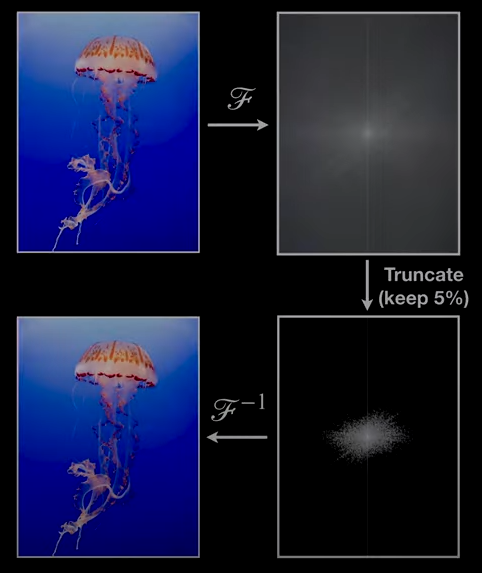
(image from professor Steve Brunton Youtube Vedio:https://www.youtube.com/watch?v=SbU1pahbbkc&ab_channel=SteveBrunton)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack as fft
from sklearn.linear_model import Lasso
from PIL import Image, ImageOps

In [2]:
# Initializing variables & signals needed for Compressed Sensing
n = 2000 # Number of data
ss = np.floor(n * 0.1).astype(int) # Limiting sample size to be 10% of data
t = np.linspace(0, 1/16, n) # Time frame
# 2 simple frequencies
y = np.cos(108 * 2 * np.pi * t) + 2 * np.sin(398 * 2 * np.pi * t)
# for more complex frequency
#y = np.cos(2 * 108 * np.pi * t) + 2 * np.sin(2 * 198 * np.pi * t) \
#    + np.sin(2 * 263 * np.pi * t) + np.cos(2 * 77 * np.pi * t) \
#    + np.cos(2 * 300 * np.pi * t)
ranIndex = np.random.randint(0, n, ss) # n * 0.1 randomly choose time intervals
sY = y[ranIndex] # sample y values corresponds to random indices

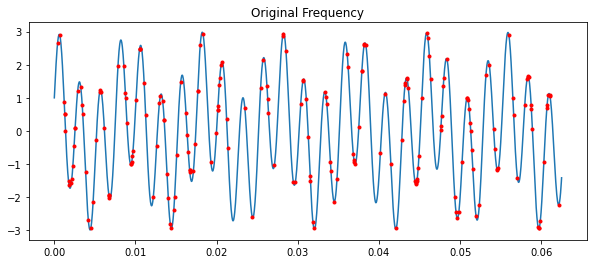

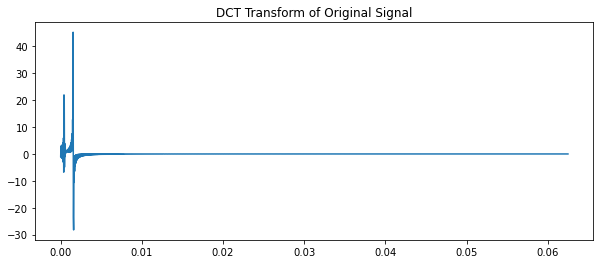

In [3]:
# Shows how original signals looks like and locations of random samples
# Also shows 200 randomly chosen samples
plt.figure(figsize = (10, 4))
plt.plot(t, y)
plt.plot(t[ranIndex], sY, 'r.')
plt.title("Original Frequency")
plt.show()
# Shows how original signal transform would be like
plt.figure(figsize = (10, 4))
plt.plot(t, fft.dct(y, norm = 'ortho')) # plot cosine transform with ortho norm
plt.title("DCT Transform of Original Signal")
plt.show()

In [4]:
# Create matrix C and apply discrete cosine transform to get Theta
c = np.eye(n)[ranIndex, :] # Creates s * n matrix C
print(c.shape)
print(ranIndex.shape)
theta = fft.dct(c) # Theta = C matrix * fft

(200, 2000)
(200,)


## Use L_1 Norm
By using L_1 Norm, we can minimize our transformed data to be mostly 0, which makes them to be sparse. We are not using L_2 norm, which is commonly used in other applications, because we want to make most of transformed data to be 0, and only keep essential data needed for restoration.
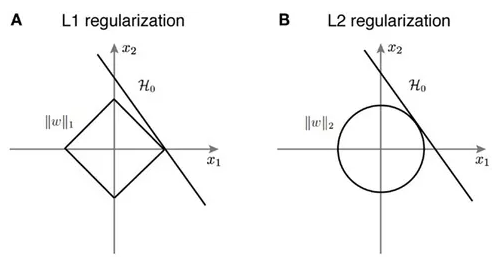
Image copied from Quora: https://www.quora.com/When-would-you-chose-L1-norm-over-L2-norm

In [5]:
# Use Lasso for L_1 Minimization to get sparsity s
#print(theta.shape, sY.shape)
mini = Lasso(alpha = 0.001)
mini.fit(theta, sY) 
s = mini.coef_ # Sparse s
#s.shape

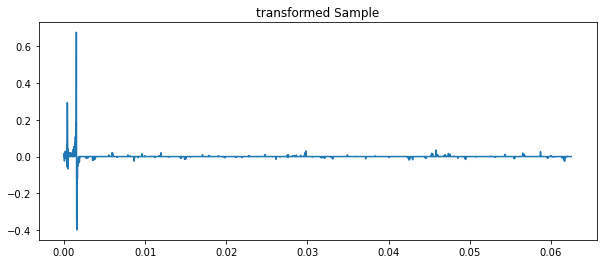

In [6]:
# Print transformed sample into graph to comapre with original
plt.figure(figsize = (10, 4))
plt.plot(t, s)
plt.title("transformed Sample")
plt.show()

In [7]:
# Reverse the DCT to reconstruct signal into frequency
reform = fft.idct(s)

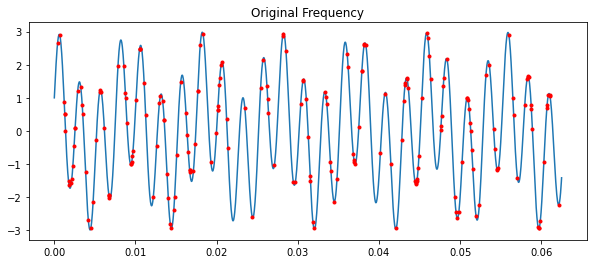

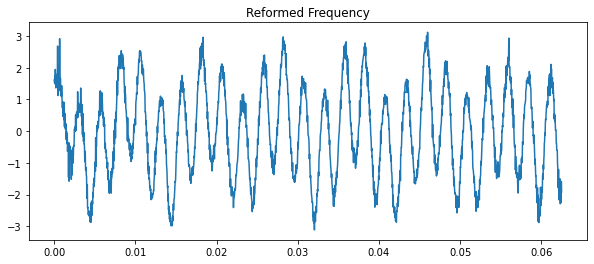

In [8]:
plt.figure(figsize = (10, 4))
plt.plot(t, y)
plt.plot(t[ranIndex], sY, 'r.')
plt.title("Original Frequency")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(t, reform)
plt.title("Reformed Frequency")
plt.show()

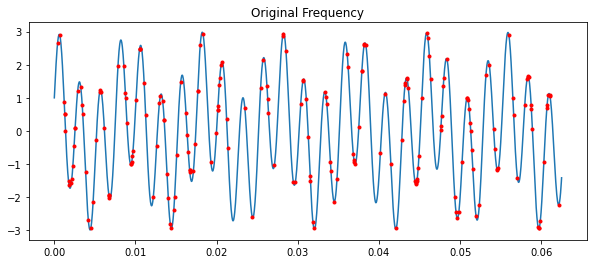

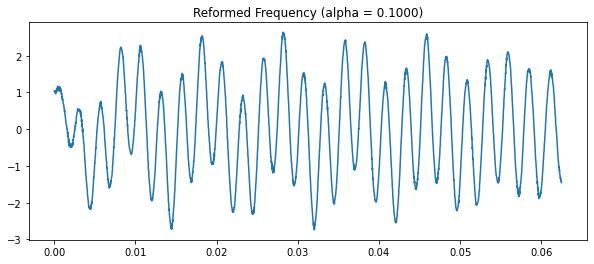

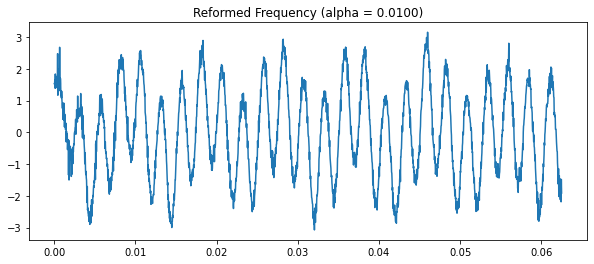

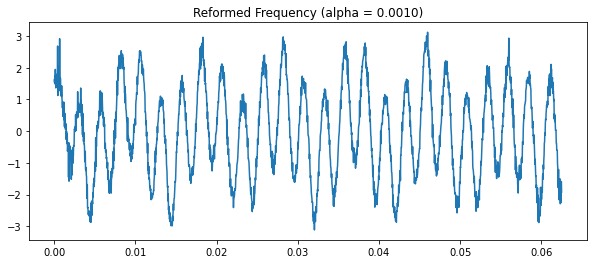

/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07874301804552196, tolerance: 0.05029996008702214
  model = cd_fast.enet_coordinate_descent(


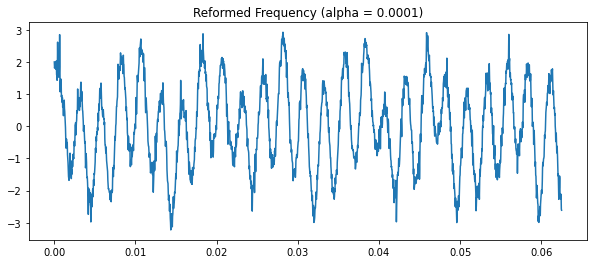

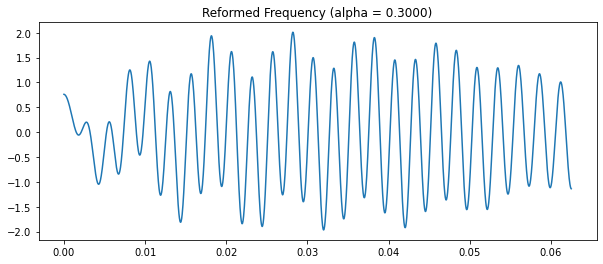

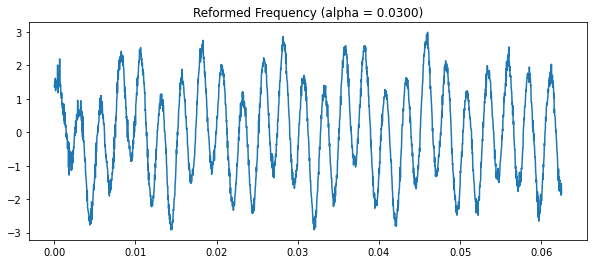

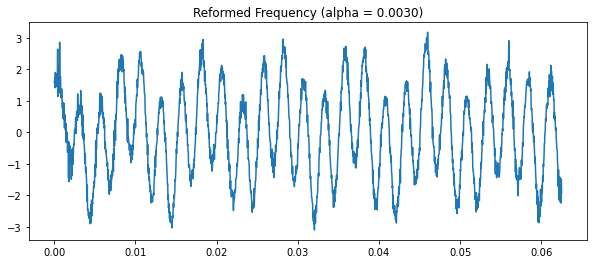

In [9]:
# Testing for various alpha penalty
alpha = [0.1, 0.01, 0.001, 0.0001, 0.3, 0.03, 0.003]
plt.figure(figsize = (10, 4))
plt.plot(t, y)
plt.plot(t[ranIndex], sY, 'r.')
plt.title("Original Frequency")
plt.show()
#coef = []
reformList = []
for a in alpha:
    mini = Lasso(alpha = a)
    mini.fit(theta, sY) 
    s = mini.coef_
    #coef.append(s)
    reform = fft.idct(s)
    
    plt.figure(figsize = (10, 4))
    plt.plot(t, reform)
    plt.title("Reformed Frequency (alpha = %.4f)" %a)
    plt.show()

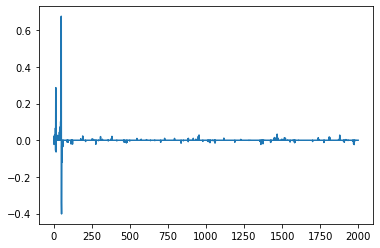

In [10]:
plt.plot(s)

# Image Compress Sensing

After Working on frequencies, I wanted to know how would it work out in 2D Array, as frequencies were 1D.

Basic approach should be similar to frequency Compress Sensing.
Like frequency, I will use 20 % to be my sample size

In [11]:
# Importing images from local machine
image = Image.open("image/image1.jpg")
image = ImageOps.grayscale(image) # Make 3D rgb imgage into GrayScale 2D array
imgArr = np.asarray(image) # Represent image to be array
imgArr.shape

(164, 307)

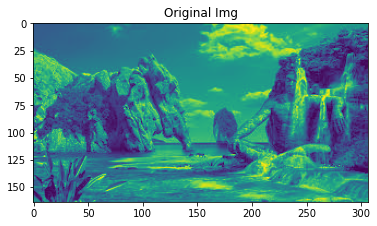

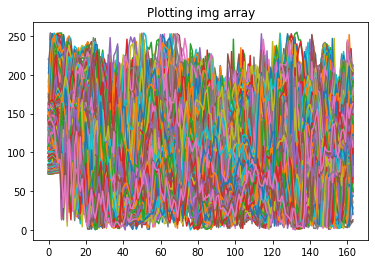

In [12]:
#Show how image looks lie
plt.imshow(imgArr)
plt.title("Original Img")
plt.show()
plt.plot(imgArr)
plt.title("Plotting img array")
plt.show()

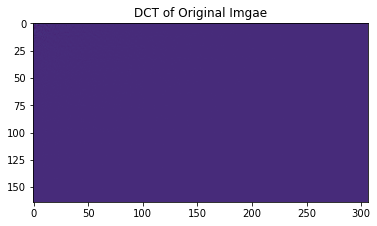

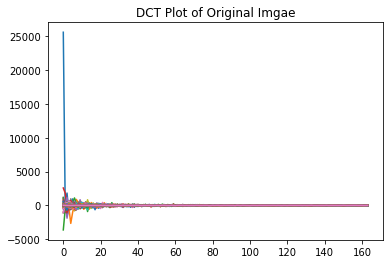

In [13]:
# Descrete cosine transform of original image
plt.imshow(fft.dctn(imgArr, norm = 'ortho'))
plt.title("DCT of Original Imgae")
plt.show()
plt.plot(fft.dctn(imgArr, norm = 'ortho'))
plt.title("DCT Plot of Original Imgae")
plt.show()

## Set Variables

#### After using dctn, added normal 1d dct to see differences

In [14]:
## For dctn/dct
n, m = imgArr.shape   #Setting n & m to be width and height of the arrag
sampleSz = np.floor(n * m * 0.2).astype(int)   #
ranIndex = np.random.permutation(n * m)[:sampleSz]
print(ranIndex.shape)
sampleImgArr = imgArr.flatten()[ranIndex]
sampleImgArr2 = imgArr.flatten()[ranIndex]

# Both reshape and np.expand_dims works
sampleImgArr = np.reshape(sampleImgArr, (sampleSz, 1))   # Now arr.shape = (sampleSz, 1)
sampleImgArr2 = np.reshape(sampleImgArr, (sampleSz, 1))

(10069,)


## Fetch sample datas into dct

In [15]:
## Create C constant matrix
C = np.eye(n*m)[ranIndex, :] #creates shape = (10069, 50348), which is (sampleSz, total sample)
C3D = np.reshape(C, (sampleSz, n, m))
theta = fft.dctn(C3D, norm = 'ortho', axes = [1,2])

## Create C2 constant matrix
#C2 = np.eye(n*m)[ranIndex2, :] #creates shape = (10069, 50348), which is (sampleSz, total sample)
#theta2 = fft.dct(C2, norm = 'ortho')

print(C.shape, theta.shape)
#print(C2.shape, theta2.shape)


(10069, 50348) (10069, 164, 307)


## Use L1 Normalization to get sparse vector

In [16]:
# Use Lasso for L_1 Minimization to get sparsity s for dctn
sampleImgArr = sampleImgArr.squeeze()
theta = np.reshape(theta, (sampleSz, (n*m)))
mini = Lasso(alpha = 0.0001)
mini.fit(theta, sampleImgArr)
s = mini.coef_ # Sparse s



In [17]:
print(theta.shape, sampleImgArr.shape)

(10069, 50348) (10069,)


In [18]:
subplot = np.zeros(n*m)
for i in range (len(subplot)):
    if (i in ranIndex):
        subplot[i] = 1
subplot = subplot.reshape(n, m)     
subplot.shape

(164, 307)

In [34]:
subplot = np.zeros(n*m)
for i in range (len(subplot)):
    if (i in ranIndex):
        subplot[i] = 1
subplot = subplot.reshape(n, m)     
subplot.shape

subplot_x = []
subplot_y = []
for i in range(n):
    for j in range(m):
        if subplot[i][j] == 1:
            subplot_y.append(i)
            subplot_x.append(j)
            
        

## Reform the Image

In [35]:
np.count_nonzero(np.array(subplot) == 1)

10069

In [36]:
reform = fft.idctn(s.reshape(n, m))
#reform2 = fft.idct(s2)

In [37]:
subplot.shape

(164, 307)

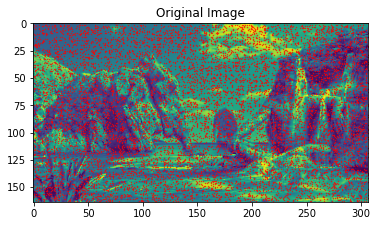

In [51]:
plt.imshow(imgArr)
plt.title("Original Image")
plt.scatter(subplot_x, subplot_y, marker='.', color = 'red', s = 0.5)
plt.show()

# reform = np.reshape(reform, (n, m))
# plt.imshow(reform)
# plt.title("Reformed Img Using dctn")
# plt.show()

#reform2 = np.reshape(reform2, (n, m))
#plt.imshow(reform2)
#plt.title("Reformed Img Using dct")
#plt.show()

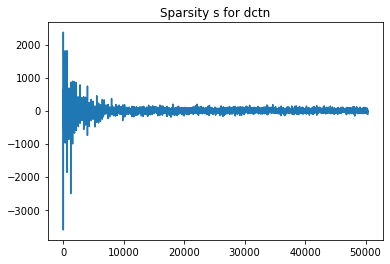

In [24]:
plt.plot(s)
plt.title("Sparsity s for dctn")
plt.show()
#plt.plot(2)
#plt.title("Sparsity s for dct")
#plt.show()

## Check for Std. Error (Frobenius Norm)

Wanted to check how far are we off using only 20 % of data.

Also check how much dctn is better than dct. However, result turned out they are the same

In [25]:
stdErr_dctn = np.linalg.norm(reform - imgArr, 'fro')
print(stdErr_dctn)
#stdErr_dct = np.linalg.norm(reform2 - imgArr, 'fro')

#print(stdErr_dctn == stdErr_dct)

4059047.0104518165


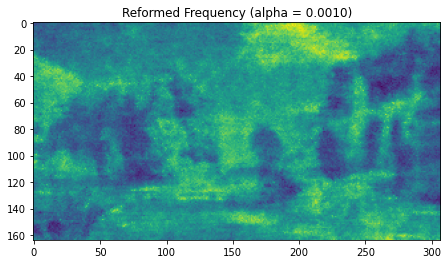

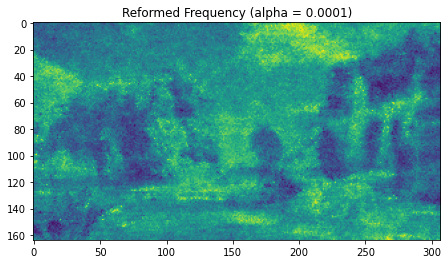

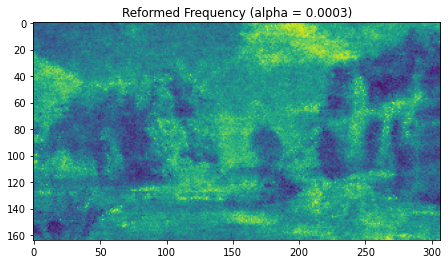

In [26]:
# Testing for various alpha penalty
alpha = [0.001, 0.0001, 0.0003]
reformList = []
for a in alpha:
    mini = Lasso(alpha = a)
    mini.fit(theta, sampleImgArr) 
    s = mini.coef_
    #coef.append(s)
    reform = fft.idctn(s.reshape(n, m))
    reform = np.reshape(reform, (n, m))
    plt.figure(figsize = (10, 4))
    plt.imshow(reform)
    plt.title("Reformed Frequency (alpha = %.4f)" %a)
    plt.show()